### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

### Importing Keras

In [2]:
import keras

C:\Users\kingsumedh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Importing keras models

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import pandas_profiling

### Using tensorflow-gpu

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2267339223695607944
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6693025874
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9064775828492228352
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


### Loading dataset

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
training_set = train_datagen.flow_from_directory('D:/Fall 18/Neural Networks/Project/Dataset/101_ObjectCategories - Train',
                                                 target_size=(64, 64),
                                                 batch_size= 32,
                                                 class_mode='categorical')

Found 6948 images belonging to 101 classes.


In [9]:
test_set = test_datagen.flow_from_directory('D:/Fall 18/Neural Networks/Project/Dataset/101_ObjectCategories - Test',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical')

Found 1729 images belonging to 101 classes.


### Building the model

In [10]:
classifier = Sequential()

In [11]:
#Creating the method for model
#Step 1- Convolution
#classifier.add(Convolution2D(256, (3, 3), input_shape = (64, 64,3), activation = 'relu'))
classifier.add(Convolution2D(128, (3, 3), input_shape = (64, 64,3), activation = 'relu'))

#adding another layer
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))

#Pooling it
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))


#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))


#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [12]:
#Step 3- Flattening
classifier.add(Flatten())

#Step 4- Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#For the output step
classifier.add(Dense(units = 101, activation = 'softmax'))
classifier.add(Dropout(0.02))
#Add reularizers
#classifier.add(Dense(128, input_dim = 128, kernel_regularizer = regularizers.l1(0.001), activity_regularizer = regularizers.l1(0.001), activation = 'relu'))
                                                                                                                                                   

In [13]:
classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
#Dropout = classifier.add(Dropout(0.2))

checkpointer101 = keras.callbacks.ModelCheckpoint(filepath = 'D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/checkp_101.hdf5', monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

plot_compare = classifier.fit_generator(training_set,
                    steps_per_epoch=(6948/32),
                    epochs = 50,
                    validation_data=test_set,
                    validation_steps=(1729/32), callbacks = [checkpointer101])

Epoch 1/50
218/217 [==============================] - 69s 316ms/step - loss: 4.1848 - acc: 0.1906 - val_loss: 3.3845 - val_acc: 0.3060
Epoch 2/50
218/217 [==============================] - 13s 61ms/step - loss: 3.4047 - acc: 0.3317 - val_loss: 2.7252 - val_acc: 0.3944
Epoch 3/50
218/217 [==============================] - 13s 62ms/step - loss: 2.8806 - acc: 0.4124 - val_loss: 2.5251 - val_acc: 0.4344
Epoch 4/50
218/217 [==============================] - 13s 62ms/step - loss: 2.5930 - acc: 0.4643 - val_loss: 2.3857 - val_acc: 0.4743
Epoch 5/50
218/217 [==============================] - 13s 61ms/step - loss: 2.3198 - acc: 0.5100 - val_loss: 2.2707 - val_acc: 0.4905
Epoch 6/50
218/217 [==============================] - 13s 62ms/step - loss: 2.1434 - acc: 0.5431 - val_loss: 2.1313 - val_acc: 0.5142
Epoch 7/50
218/217 [==============================] - 13s 61ms/step - loss: 1.9107 - acc: 0.5829 - val_loss: 2.0006 - val_acc: 0.5356
Epoch 8/50
218/217 [==============================] - 13s 62m

In [15]:
plot_compare.history['val_acc']

[0.302486986697513,
 0.3973395026026605,
 0.45112781954887216,
 0.4916136495083864,
 0.5095430884904569,
 0.5286292654713707,
 0.5401966454598034,
 0.5558126084441873,
 0.5610179294389821,
 0.5662232504337767,
 0.5748987854251012,
 0.5870445344129555,
 0.5679583574320416,
 0.5575477154424523,
 0.5841526894158473,
 0.5731636784268364,
 0.5858877964141121,
 0.56737998843262,
 0.5974551764025449,
 0.5858877964141121,
 0.584731058415269,
 0.5864661654135338,
 0.5899363794100636,
 0.5922498554077501,
 0.5962984384037016,
 0.5864661654135338,
 0.5621746674378253,
 0.606709080393291,
 0.5957200694042799,
 0.6009253903990746,
 0.5980335454019664,
 0.5887796414112204,
 0.5974551764025449,
 0.5870445344129555,
 0.6020821283979179,
 0.5957200694042799,
 0.5928282244071718,
 0.584731058415269,
 0.5934065934065934,
 0.582995951417004,
 0.5853094274146906,
 0.5991902834008097,
 0.6084441873915558,
 0.5858877964141121,
 0.5864661654135338,
 0.6096009253903991,
 0.5864661654135338,
 0.604973973395026,

In [270]:
plot_compare.history['acc']

[0.18537708693149108,
 0.32498560736902704,
 0.40875071963154863,
 0.46445020149683364,
 0.5218767990788716,
 0.5441853770869315,
 0.5869314910765688,
 0.6126943005181347,
 0.6345710995970063,
 0.6470926885434658,
 0.6696891191709845,
 0.6905584340817501,
 0.7003454231433506,
 0.711139896373057,
 0.732153137593552,
 0.7429476108232584,
 0.748272884283247,
 0.7533103051237766,
 0.7701496833621186,
 0.7818077144502015,
 0.7838226827864133,
 0.7993667242371906,
 0.7964881980426022,
 0.7980713874496258,
 0.803972366148532,
 0.818077144502015,
 0.8185089234312032,
 0.8183649971214738,
 0.83664363845711,
 0.830454807138745,
 0.8442717328727691,
 0.8369314910765688,
 0.8432642487046632,
 0.8575129533678757,
 0.8544905008635578,
 0.8580886586067933,
 0.8625503742084053,
 0.8566493955094991,
 0.8621185952792171,
 0.8681635002878526,
 0.8697466896948762,
 0.8652849740932642,
 0.8837075417386299,
 0.8821243523316062,
 0.8821243523316062,
 0.8858664363845711,
 0.8932066781807715,
 0.89248704663212

### Plotting the graph of accuracy vs validation accuracy

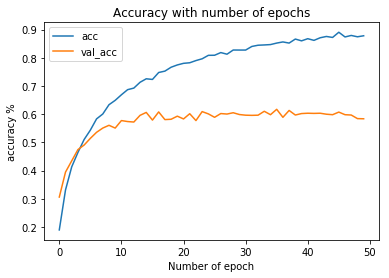

In [15]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['acc'])
pllt.plot(plot_compare.history['val_acc'])
pllt.title('Accuracy with number of epochs')
pllt.ylabel('accuracy %')
pllt.xlabel('Number of epoch')
pllt.legend(['acc', 'val_acc'])
pllt.show()

### Plotting the graph of loss between training set and test set

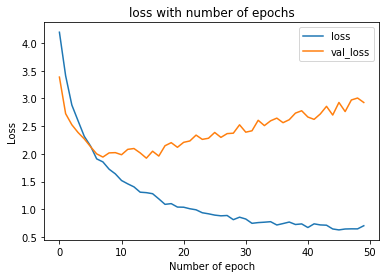

In [17]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['loss'])
pllt.plot(plot_compare.history['val_loss'])
pllt.title('loss with number of epochs')
pllt.ylabel('Loss')
pllt.xlabel('Number of epoch')
pllt.legend(['loss', 'val_loss'])
pllt.show()

### Inputing new image to predict its class

In [18]:
from keras.preprocessing import image as image_utils
test_image = image_utils.load_img('D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/bonsait.jpg', target_size=(64, 64))
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [19]:
test_set.class_indices

{'Faces': 0,
 'Faces_easy': 1,
 'Leopards': 2,
 'Motorbikes': 3,
 'accordion': 4,
 'airplanes': 5,
 'anchor': 6,
 'ant': 7,
 'barrel': 8,
 'bass': 9,
 'beaver': 10,
 'binocular': 11,
 'bonsai': 12,
 'brain': 13,
 'brontosaurus': 14,
 'buddha': 15,
 'butterfly': 16,
 'camera': 17,
 'cannon': 18,
 'car_side': 19,
 'ceiling_fan': 20,
 'cellphone': 21,
 'chair': 22,
 'chandelier': 23,
 'cougar_body': 24,
 'cougar_face': 25,
 'crab': 26,
 'crayfish': 27,
 'crocodile': 28,
 'crocodile_head': 29,
 'cup': 30,
 'dalmatian': 31,
 'dollar_bill': 32,
 'dolphin': 33,
 'dragonfly': 34,
 'electric_guitar': 35,
 'elephant': 36,
 'emu': 37,
 'euphonium': 38,
 'ewer': 39,
 'ferry': 40,
 'flamingo': 41,
 'flamingo_head': 42,
 'garfield': 43,
 'gerenuk': 44,
 'gramophone': 45,
 'grand_piano': 46,
 'hawksbill': 47,
 'headphone': 48,
 'hedgehog': 49,
 'helicopter': 50,
 'ibis': 51,
 'inline_skate': 52,
 'joshua_tree': 53,
 'kangaroo': 54,
 'ketch': 55,
 'lamp': 56,
 'laptop': 57,
 'llama': 58,
 'lobster': 5

In [20]:
result = classifier.predict_on_batch(test_image)
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

### Getting the class and label of the input image

In [21]:
print(result.argmax())
for category, value in test_set.class_indices.items():
            if value == result.argmax():
                print(category)

12
bonsai


### Summary of the model

In [22]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
__________

### Visualizing the impact of each layer on an input image

In [23]:
import cv2
import matplotlib.pyplot as pllt
%matplotlib inline

In [24]:
h = cv2.imread('D:/Fall 18/Neural Networks/Project/Object Detection/tree.png')

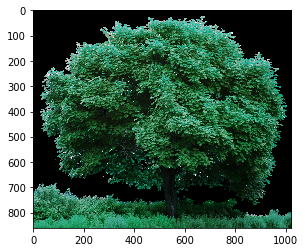

In [25]:
pllt.imshow(h)

In [26]:
h.shape

(861, 1023, 3)

In [27]:
test_model = Sequential()
test_model.add(Convolution2D(3, (3, 3), input_shape = h.shape, activation = 'relu'))


In [28]:
h_batch = np.expand_dims(h, axis=0)

In [29]:
conv_h = test_model.predict(h_batch)

In [30]:
def visualize_h(test_model,h):
    h_batch = np.expand_dims(h, axis=0)
    conv_h = test_model.predict(h_batch)
    conv_h = np.squeeze(conv_h, axis=0)
    print (conv_h.shape)
    pllt.imshow(conv_h)

### After first convolutional layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(859, 1021, 3)


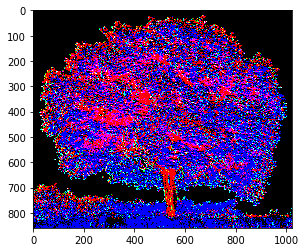

In [31]:
visualize_h(test_model,h)

### After max pooling

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(429, 510, 3)


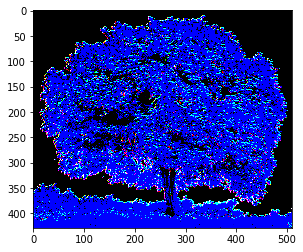

In [32]:
test_model = Sequential()
test_model.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model.add(MaxPooling2D(pool_size = (2, 2)))

visualize_h(test_model,h)

### Adding another layer to the model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(428, 509, 3)


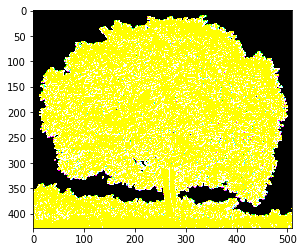

In [33]:
test_model = Sequential()
test_model.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model.add(MaxPooling2D(pool_size = (2, 2)))

visualize_h(test_model,h)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(426, 507, 3)


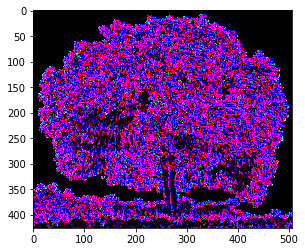

In [34]:
test_model = Sequential()
test_model.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model.add(MaxPooling2D(pool_size = (2, 2)))
test_model.add(Convolution2D(3, (3, 3), activation = 'relu'))
#test_model.add(MaxPooling2D(pool_size = (5, 5)))

visualize_h(test_model,h)


### Final max pooling layers

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(213, 253, 3)


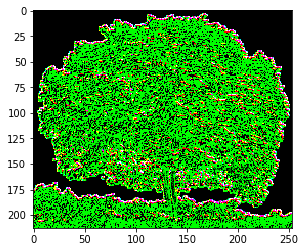

In [35]:
test_model = Sequential()
test_model.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model.add(MaxPooling2D(pool_size = (2, 2)))
test_model.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model.add(MaxPooling2D(pool_size = (2, 2)))

visualize_h(test_model,h)

### Visualizing on other Images

In [38]:
h1 = cv2.imread('D:/Fall 18/Neural Networks/Project/Object Detection/Bike.jpg')

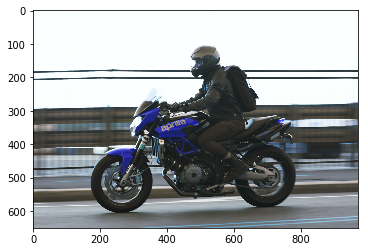

In [39]:
pllt.imshow(h1)

In [40]:
h1.shape

(650, 970, 3)

In [41]:
test_model1 = Sequential()
test_model1.add(Convolution2D(3, (3, 3), input_shape = h1.shape, activation = 'relu'))

In [42]:
h1_batch = np.expand_dims(h1, axis=0)

In [43]:
conv_h1 = test_model1.predict(h1_batch)

In [44]:
def visualize_h1(test_model1,h1):
    h1_batch = np.expand_dims(h1, axis=0)
    conv_h1 = test_model1.predict(h1_batch)
    conv_h1 = np.squeeze(conv_h1, axis=0)
    print (conv_h1.shape)
    pllt.imshow(conv_h1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(648, 968, 3)


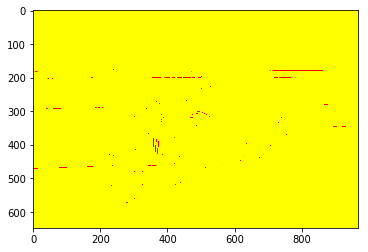

In [45]:
visualize_h1(test_model1,h1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(324, 484, 3)


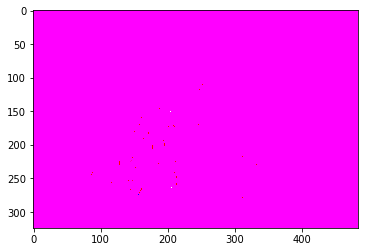

In [46]:
test_model1 = Sequential()
test_model1.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model1.add(MaxPooling2D(pool_size = (2, 2)))

visualize_h1(test_model1,h1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(323, 483, 3)


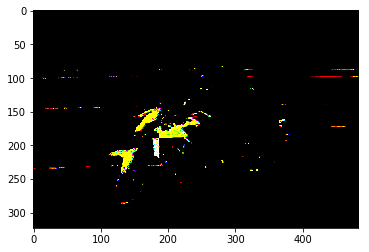

In [47]:
test_model1 = Sequential()
test_model1.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model1.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model1.add(MaxPooling2D(pool_size = (2, 2)))

visualize_h1(test_model1,h1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(321, 481, 3)


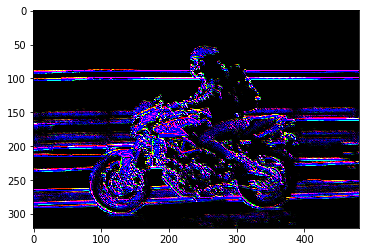

In [48]:
test_model1 = Sequential()
test_model1.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model1.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model1.add(MaxPooling2D(pool_size = (2, 2)))
test_model1.add(Convolution2D(3, (3, 3), activation = 'relu'))

visualize_h1(test_model1,h1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(160, 240, 3)


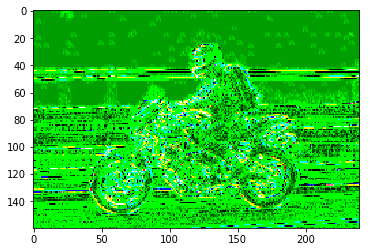

In [49]:
test_model1 = Sequential()
test_model1.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model1.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model1.add(MaxPooling2D(pool_size = (2, 2)))
test_model1.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model1.add(MaxPooling2D(pool_size = (2, 2)))

visualize_h1(test_model1,h1)

In [102]:
h2 = cv2.imread('D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/Train/Faces/image_0066.jpg')

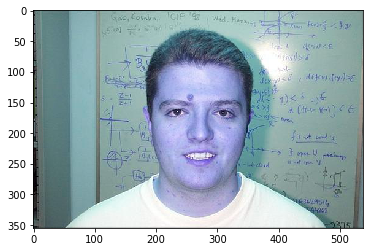

In [103]:
pllt.imshow(h2)

In [104]:
h2.shape

(355, 538, 3)

In [105]:
test_model2 = Sequential()
test_model2.add(Convolution2D(3, (3, 3), input_shape = h2.shape, activation = 'relu'))

In [106]:
h2_batch = np.expand_dims(h2, axis=0)

In [107]:
conv_h2 = test_model2.predict(h2_batch)

In [108]:
def visualize_h2(test_model2,h2):
    h2_batch = np.expand_dims(h2, axis=0)
    conv_h2 = test_model2.predict(h2_batch)
    conv_h2 = np.squeeze(conv_h2, axis=0)
    print (conv_h2.shape)
    pllt.imshow(conv_h2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(353, 536, 3)


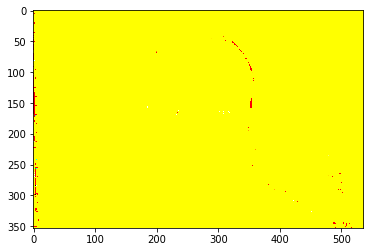

In [109]:
visualize_h2(test_model2,h2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(176, 268, 3)


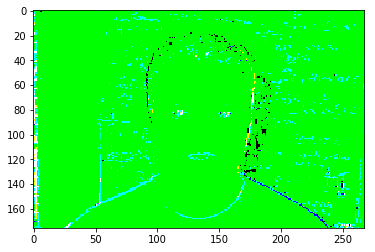

In [110]:
test_model2 = Sequential()
test_model2.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model2.add(MaxPooling2D(pool_size = (2, 2)))

visualize_h2(test_model2,h2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(175, 267, 3)


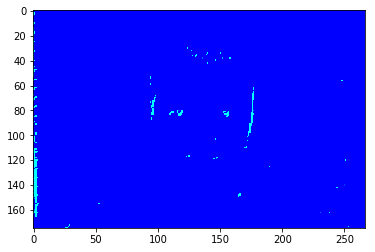

In [111]:
test_model2 = Sequential()
test_model2.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model2.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model2.add(MaxPooling2D(pool_size = (2, 2)))

visualize_h2(test_model2,h2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(86, 132, 3)


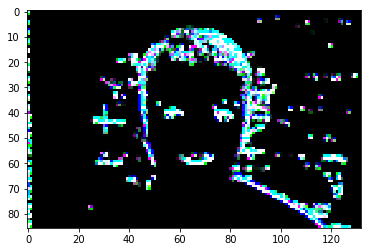

In [96]:
test_model2 = Sequential()
test_model2.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model2.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model2.add(MaxPooling2D(pool_size = (2, 2)))
test_model2.add(Convolution2D(3, (3, 3), activation = 'relu'))
test_model2.add(MaxPooling2D(pool_size = (2, 2)))

visualize_h2(test_model2,h2)